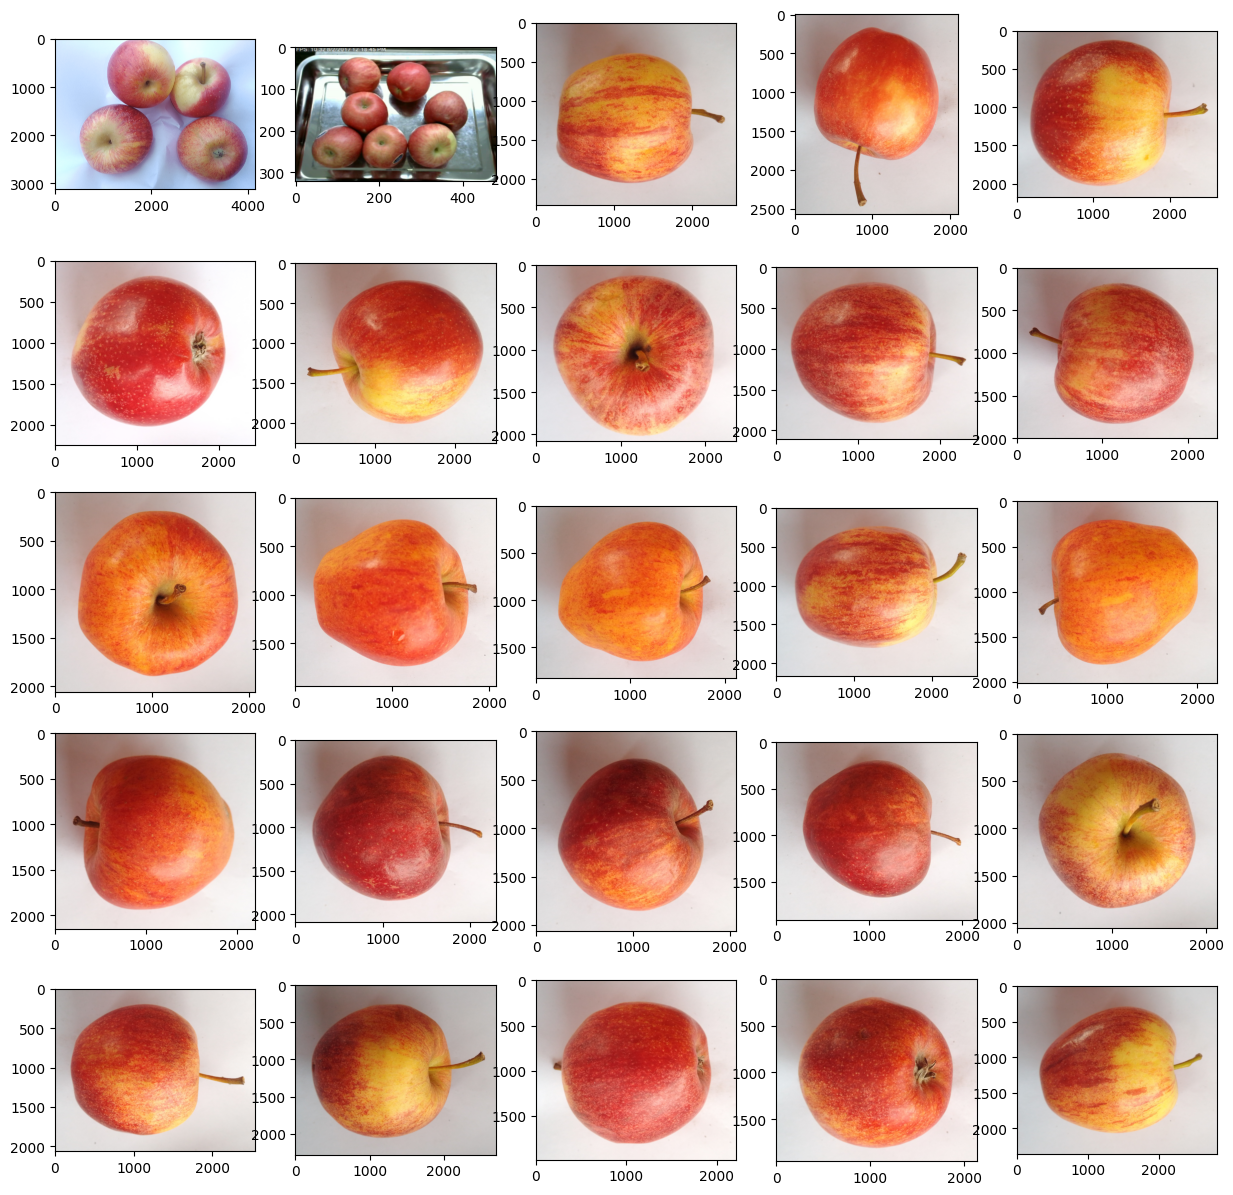

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))
carpeta=r"C:\Users\alexa\OneDrive\Escritorio\LAMBTON COLLEGE\2nd semester\Introduction to Artificial Intelligence\Project\Apple__Healthy"
imagenes=os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
    plt.subplot(5,5,i+1)
    imagen=mpimg.imread(carpeta+"/"+nombreimg)
    plt.imshow(imagen)

(100, 100, 1)
(100, 100, 1)
(100, 100, 1)
(100, 100, 1)
(100, 100, 1)
(100, 100, 1)
(100, 100, 1)
(100, 100, 1)
(100, 100, 1)
(100, 100, 1)
(100, 100, 1)
(100, 100, 1)
(100, 100, 1)
(100, 100, 1)
(100, 100, 1)
(100, 100, 1)
(100, 100, 1)
(100, 100, 1)
(100, 100, 1)
(100, 100, 1)
(100, 100, 1)
(100, 100, 1)
(100, 100, 1)
(100, 100, 1)
(100, 100, 1)


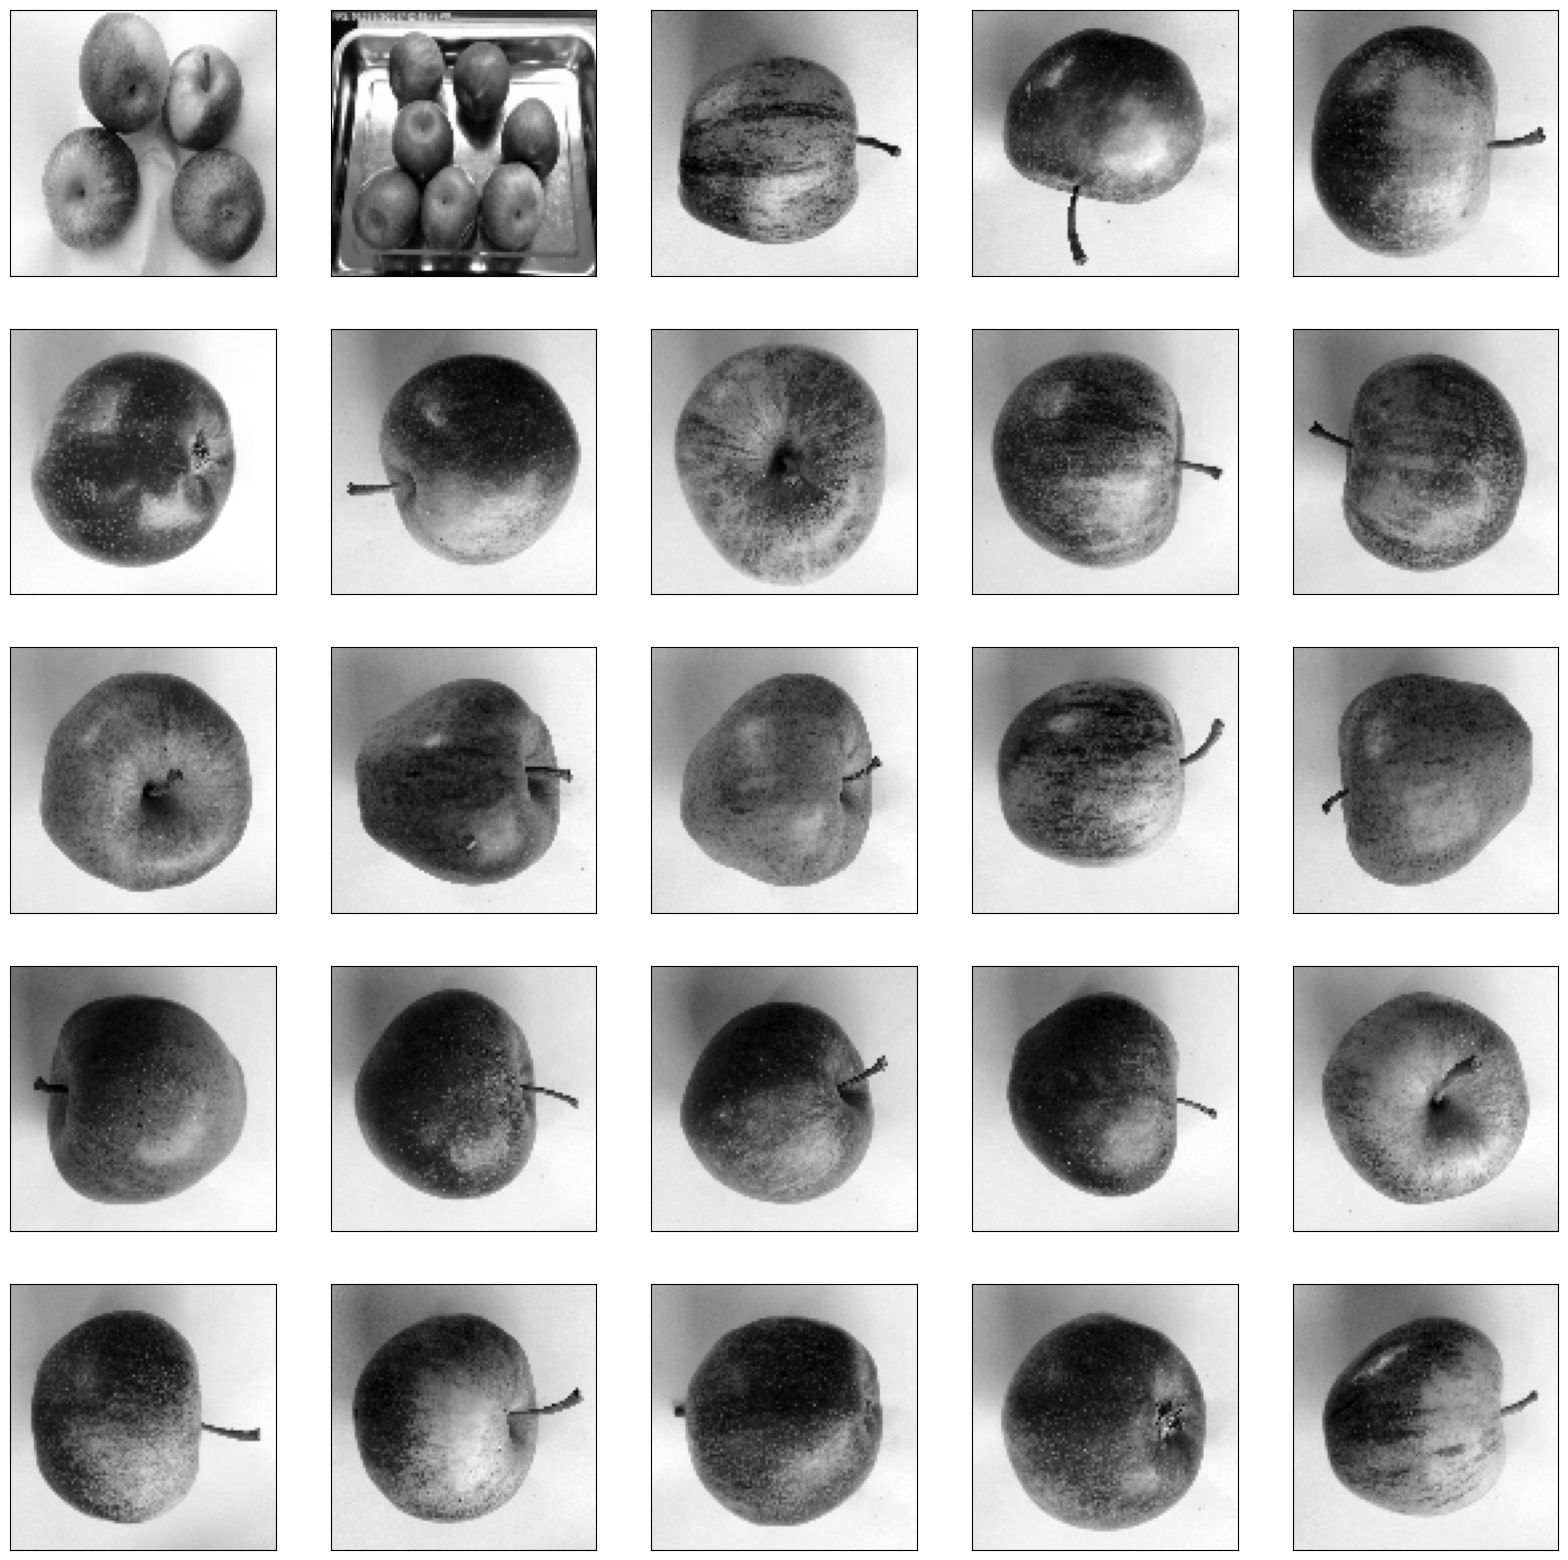

In [4]:
import cv2

plt.figure(figsize=(20,20))

TAMAÑO_IMG=100

for i, nombreimg in enumerate(imagenes[:25]):
    plt.subplot(5,5,i+1)
    imagen=mpimg.imread(carpeta+"/"+nombreimg)
    #print(imagen.shape)
    imagen=cv2.resize(imagen,(TAMAÑO_IMG,TAMAÑO_IMG))
    imagen=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
    #print(imagen.shape)
    imagen = imagen.reshape(100, 100, 1)
    print(imagen.shape)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen,cmap="gray")

In [4]:
import shutil

carpeta_fuente=r"C:\Users\alexa\OneDrive\Escritorio\LAMBTON COLLEGE\2nd semester\Introduction to Artificial Intelligence\Project\Apple__Healthy"
carpeta_destino=r"C:\Users\alexa\OneDrive\Escritorio\LAMBTON COLLEGE\2nd semester\Introduction to Artificial Intelligence\Project\dataset\Apple__Healthy"

imagenes=os.listdir(carpeta_fuente)

"""
for i,nombreimg in enumerate(imagenes):
    if i<419:
        shutil.copy(carpeta_fuente+"/"+nombreimg,carpeta_destino+"/"+nombreimg)"""

In [5]:
carpeta_fuente=r"C:\Users\alexa\OneDrive\Escritorio\LAMBTON COLLEGE\2nd semester\Introduction to Artificial Intelligence\Project\Apple__Rotten"
carpeta_destino=r"C:\Users\alexa\OneDrive\Escritorio\LAMBTON COLLEGE\2nd semester\Introduction to Artificial Intelligence\Project\dataset\Apple__Rotten"

imagenes=os.listdir(carpeta_fuente)

"""
for i,nombreimg in enumerate(imagenes):
    if i<419:
        shutil.copy(carpeta_fuente+"/"+nombreimg,carpeta_destino+"/"+nombreimg)"""

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=15,
    zoom_range=[0.5,1.5],
    validation_split=0.2
)


data_gen_entramiento=datagen.flow_from_directory(r"C:\Users\alexa\OneDrive\Escritorio\LAMBTON COLLEGE\2nd semester\Introduction to Artificial Intelligence\Project\dataset",target_size=(100,100)
                                                 ,batch_size=32,shuffle=True,subset="training")

data_gen_pruebas=datagen.flow_from_directory(r"C:\Users\alexa\OneDrive\Escritorio\LAMBTON COLLEGE\2nd semester\Introduction to Artificial Intelligence\Project\dataset",target_size=(100,100)
                                                 ,batch_size=32,shuffle=True,subset="validation")



Found 672 images belonging to 2 classes.
Found 166 images belonging to 2 classes.


(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)
(32, 100, 100, 3)


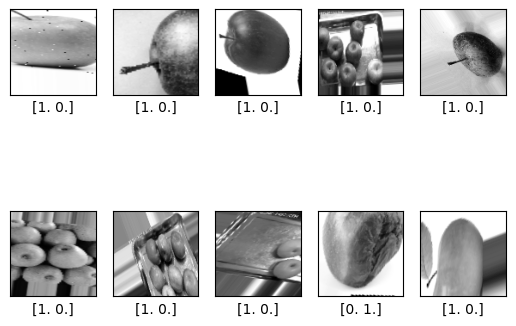

In [6]:
import cv2

#plt.figure(figsize=(20,20))

#TAMAÑO_IMG=200

for imagen,etiqueta in data_gen_entramiento:
    for i in range(10):
        print(imagen.shape)
        imagen_gris = cv2.cvtColor(imagen[i], cv2.COLOR_RGB2GRAY)
        plt.subplot(2,5,i+1)
        plt.xticks([])
        plt.yticks([])
        #plt.imshow(imagen[i])
        plt.imshow(imagen_gris,cmap="gray")
        # Convertir la etiqueta a texto legible
        """
        if etiqueta[i][0] == 0 and etiqueta[i][1] == 1:
            etiqueta_texto = "Not Healthy"
        elif etiqueta[i][0] == 1 and etiqueta[i][1] == 0:
            etiqueta_texto = "Healthy"
        else:
            etiqueta_texto = "Desconocido"
        
        plt.xlabel(etiqueta_texto)
        """
        plt.xlabel(etiqueta[i])
    break

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)


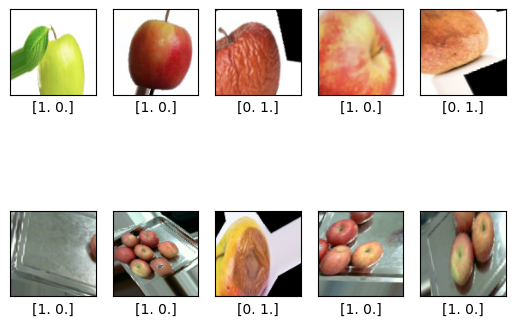

In [9]:
for imagenes, etiquetas in data_gen_entramiento:
    for i in range(len(imagenes)):
        imagen_actual = imagenes[i]  # Obtener la imagen actual del lote
        
        # Redimensionar y mostrar la imagen en escala de grises
        #imagen_actual = cv2.cvtColor(imagen_actual, cv2.COLOR_RGB2GRAY)
        plt.subplot(2, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imagen_actual)
        #plt.imshow(imagen_actual, cmap="gray")
        plt.xlabel(etiquetas[i])  # Mostrar la etiqueta en el gráfico
        print(imagen_actual.shape)
        if i == 9:
            break  # Mostrar solo las primeras 10 imágenes
    break  # Romper el bucle externo después del primer lote


In [10]:
datos_entrenamiento=[]
for imagenes, etiquetas in data_gen_entramiento:
    for i in range(len(imagenes)):
        imagen_actual = imagenes[i]  # Obtener la imagen actual del lote
        imagen_actual=cv2.resize(imagen_actual, (100, 100))
        imagen_actual=cv2.cvtColor(imagen_actual, cv2.COLOR_RGB2GRAY)
        imagen_actual = imagen_actual.reshape(100, 100, 1)
        datos_entrenamiento.append([imagen, etiqueta])
        # Redimensionar y mostrar la imagen en escala de grises
        #imagen_actual = cv2.cvtColor(imagen_actual, cv2.COLOR_RGB2GRAY)
        #print(imagen_actual.shape)
        


KeyboardInterrupt: 

In [10]:
datos_entrenamiento=[]

for imagen,etiqueta in data_gen_entramiento:
    imagen = cv2.resize(imagen, (100, 100))
    imagen = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)
    imagen = imagen.reshape(100, 100, 1)
    datos_entrenamiento.append([imagen, etiqueta])


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:3789: error: (-215:Assertion failed) !dsize.empty() in function 'cv::hal::resize'


In [ ]:
datos_entrenamiento[0]